Iteration Number: 0
Centroids [[2.35, 1.7], [1.55, 3.2]]
Iteration Number: 1
Centroids [[1.3667, 2.9667], [2.8, 1.4333]]
Iteration Number: 2
Centroids [[1.3667, 2.9667], [2.8, 1.4333]]

================RESULT Kmean: Cluster Convergence==================

Final Cluster means: [[1.3667, 2.9667], [2.8, 1.4333]]

Graph plot showing the 2 clusters by kmean algorithm alongwith their cluster means (bigger dots in red and blue) 

For k=2 kmean algorithm two clusters showing in RED and BLUE with the mean centers highlighted in bold


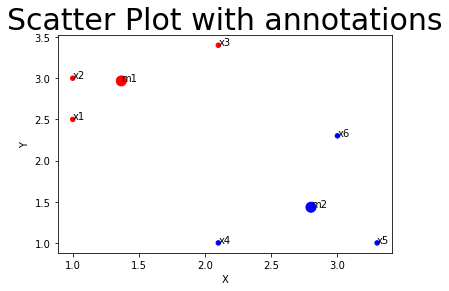

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math


# Compute Euclidean distance between 2 points
def euclideanDistance(x, y):
    return math.sqrt(pow((x[0] - y[0]),2) + pow((x[1] - y[1]),2))


# plotting graph to show clusters and the centroids
def plot_graph(data, mean_centroids):
    
    data = pd.DataFrame(data, columns = ['x', 'y','cluster'])
    centroids = pd.DataFrame(mean_centroids, columns = ['x', 'y'])
    
    colors = {0:'red', 1:'blue'}
    colors1 = {0.0:'red', 1.0:'blue'}
    annotations1=["x1","x2","x3","x4","x5","x6"]
    annotations2=["m1","m2"]

    plt.scatter(data.iloc[:,0], data.iloc[:,1],  marker = 'o', s=20,c = data['cluster'].apply(lambda x: colors1[x]))
    
    plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', s=100, 
               c = centroids.index.map(lambda x: colors[x]))
    plt.xlabel("X")
    plt.ylabel("Y")

    plt.title("Scatter Plot with annotations",fontsize=30)
    for i, label in enumerate(annotations1):
        plt.annotate(label, (data['x'][i], data['y'][i]))
    for i, label in enumerate(annotations2):
        plt.annotate(label, (centroids['x'][i], centroids['y'][i]))
    plt.show()
 
    return


# Function defination to compute the distance between the means and forming clusters
def calculateMeanCluster(data, centers): 
    N = len(data)
    k = len(centers)
    dist_matrix = np.zeros((N, k))
    
    for i in range(N):
        for j in range(k):
            dist_matrix[i][j] = round(euclideanDistance(data[i], centers[j]),3)
    cluster_number = np.argmin(dist_matrix, axis=1)

#     print("cluster_number",cluster_number)
    dict_clusters= {}
    for i in range(N):
        if cluster_number[i] in dict_clusters:
            newlist = dict_clusters[cluster_number[i]]
            newlist.append(list(data[i]))
            dict_clusters[cluster_number[i]] = newlist
        else:
            dict_clusters[cluster_number[i]] = [list(data[i])]
            
    updated_mean_centers = []
    for i in dict_clusters:
        updated_mean_center = np.around(np.mean(np.array(dict_clusters[i]), axis=0),4)
        updated_mean_centers.append(list(updated_mean_center))
    print('Centroids',updated_mean_centers)
    
    return (updated_mean_centers, cluster_number)


#function to drive up to the convergence point of kmean algorithm
def kmeans(data, mean_centers, threshold=1000):
    clust_num_final = []
    for i in range(threshold):
        isMeanEqual = True
        print('Iteration Number:',i)
        updated_mean_centers, clust_num_final = calculateMeanCluster(data, mean_centers)
        for j in range(len(updated_mean_centers)):
            if  euclideanDistance(updated_mean_centers[j],mean_centers[j])!=0.0:
                isMeanEqual= False
                break
        mean_centers = updated_mean_centers        
        if isMeanEqual:
            break
    
    data_final = np.empty((len(clust_num_final), 3))
    for i in range(len(clust_num_final)):
        data_final[i] = np.append(data[i], clust_num_final[i])

    print("\n================RESULT Kmean: Cluster Convergence==================\n") 
    print("Final Cluster means:",mean_centers)
    
    print("\nGraph plot showing the 2 clusters by kmean algorithm alongwith their cluster means (bigger dots in red and blue) ")
    print("\nFor k=2 kmean algorithm two clusters showing in RED and BLUE with the mean centers highlighted in bold")
    plot_graph(data_final, mean_centers)

    
#main function     
def main():

    #gender data set used 
    data = np.array([
    [1, 2.5], # person A
    [1, 3], # person A
    [2.1, 3.4], # Person A
    [2.1, 1], # person B
    [3.3, 1], # person B
    [3, 2.3], # person B
    ])

    #taking 2 initial mean as data for k=2 kmean, points x1 and x2 i.e data[0] and data[1] arbitariliy
    kmeans(data, [data[0], data[1]]) 
    
if __name__ == "__main__":
    main()